# Research different model serving option(s) and explain what would be the right choice for 
your case (4 marks)

The different models that we served previously in the indiviual task is :

1. For Intent we have used BERT Model with different Intent where we are getting accuracy of approx 85-90%  based upon the runs of the Epochs

2. For Name Entity Recognization we runs 3 different models i.e. BERT (Using Simple Transformer) , SPACY and Customized SPACY and we have foung the below analysis for that


If we check in BERT model although it is giving the 97-98% of accuracy but it can't identifies in between Person and Restraurant name as per our Dataset as shown in above output [[{'order': 'served_dish'}, {'fish': 'served_dish'}]] as shoen in below screenshot 1 ,So although the accuracy is really good but it doesn't fulfil our coorect needs because output should be [{'Kevin': 'person'},{'Tesco': 'Org'}]] and rest things it is predicting correct. So even the good accuracy doesn't lead to accurate result , to make this more efficient we can use some dummy dataset that contains some random data or some random test that defines person name and location as a Entity as we done in SPACY model.


Screenshot 1:


The different models that we served previously in the indiviual task is :

1. For Intent we have used BERT Model with different Intent where we are getting accuracy of approx 85-90%  based upon the runs of the Epochs

2. For Name Entity Recognization we runs 3 different models i.e. BERT (Using Simple Transformer) , SPACY and Customized SPACY and we have foung the below analysis for that


If we check in BERT model although it is giving the 97-98% of accuracy but it can't identifies in between Person and Restraurant name as per our Dataset as shown in above output [[{'order': 'served_dish'}, {'fish': 'served_dish'}]] as shoen in below screenshot 1 ,So although the accuracy is really good but it doesn't fulfil our coorect needs because output should be [{'Kevin': 'person'},{'Tesco': 'Org'}]] and rest things it is predicting correct. So even the good accuracy doesn't lead to accurate result , to make this more efficient we can use some dummy dataset that contains some random data or some random test that defines person name and location as a Entity as we done in SPACY model.


Screenshot 1:

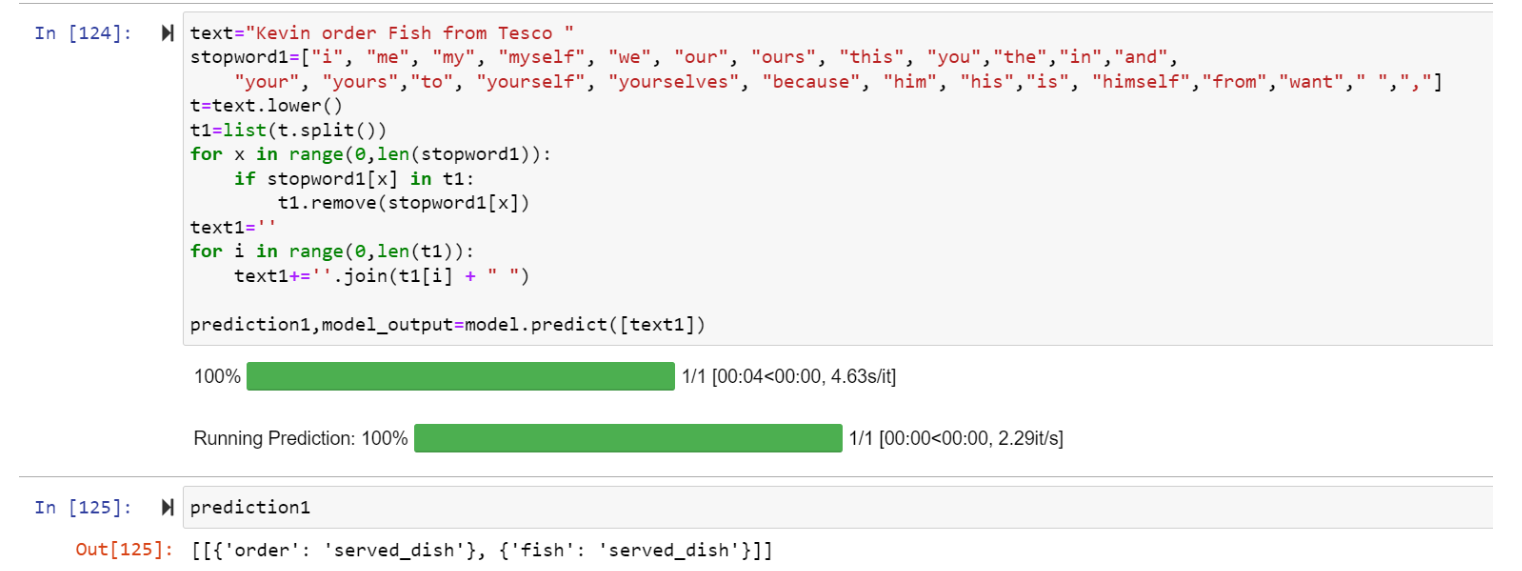


If we see SPACY models, Here we think to add one more Entity with name "food" as we are working on Dataset of the resturant with already have the Entity with the name "Restraurant","Restraurant_Type" but we donot have the any Entity with "Food" as we are working with Restraurant dataset ,We think to add one Entity with "Food" to check what will be Impact on accuracy . Here I have taken one Revision Dataset as well just to add the Cardinality so that our chatbot become more effiicient in finding the Person Name and Restraurant Name as shown above the overall accuracy is fine i.e 88%(approx) and we can seen below the output for accuracy of every entity with seems to be good except the product .


DATE | 86.84%
PERSON | 66.67%
ORG | 87.88%
PERCENT | 100.00%
MONEY | 96.23%
GPE | 93.48%
QUANTITY | 100.00%
CARDINAL | 50.00%
ORDINAL | 100.00%
LOC | 100.00%

Overall accuracy: 88.00%



And In SPACY model after training of data when we have given the input we can see in below screenshot that our model is correctly able to find location ,person,quantity and food. So we can say that although our SPACY model is giving less accuracy then BERT model but it is more efficient than that of BERT.

Screenshot of above Output:

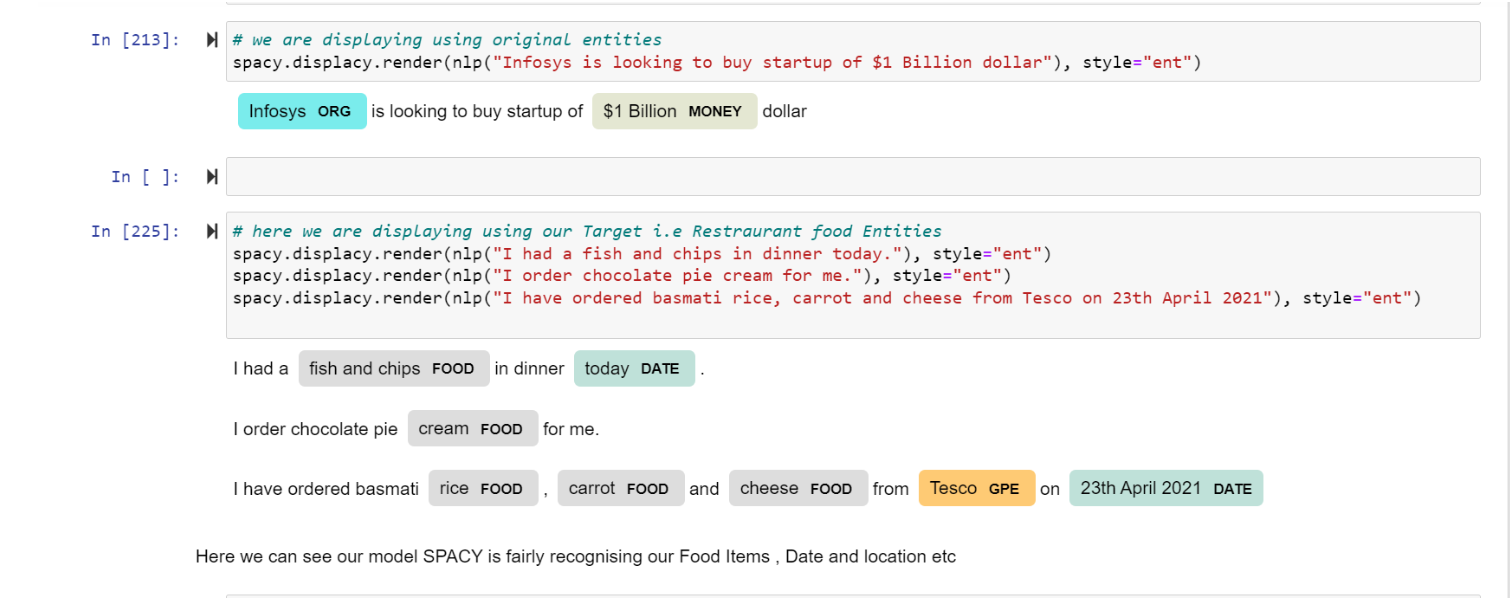


So here we can say that if we compare Both the models we can say that SPACY has more efficient and fulfil our needs as per our dataset and our requirement and works more efficiently than BERT .



If we see SPACY models, Here we think to add one more Entity with name "food" as we are working on Dataset of the resturant with already have the Entity with the name "Restraurant","Restraurant_Type" but we donot have the any Entity with "Food" as we are working with Restraurant dataset ,We think to add one Entity with "Food" to check what will be Impact on accuracy . Here I have taken one Revision Dataset as well just to add the Cardinality so that our chatbot become more effiicient in finding the Person Name and Restraurant Name as shown above the overall accuracy is fine i.e 88%(approx) and we can seen below the output for accuracy of every entity with seems to be good except the product .


DATE | 86.84%
PERSON | 66.67%
ORG | 87.88%
PERCENT | 100.00%
MONEY | 96.23%
GPE | 93.48%
QUANTITY | 100.00%
CARDINAL | 50.00%
ORDINAL | 100.00%
LOC | 100.00%

Overall accuracy: 88.00%



And In SPACY model after training of data when we have given the input we can see in below screenshot that our model is correctly able to find location ,person,quantity and food. So we can say that although our SPACY model is giving less accuracy then BERT model but it is more efficient than that of BERT.

Screenshot of above Output:

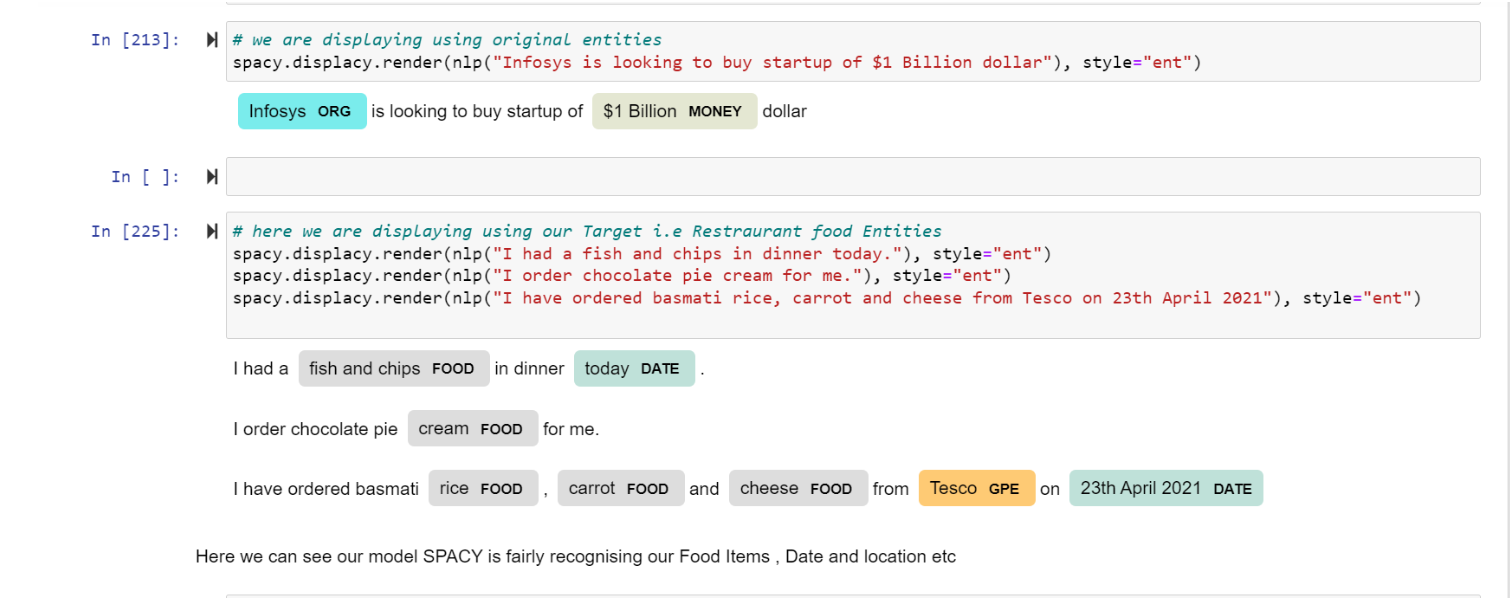


So here we can say that if we compare Both the models we can say that SPACY has more efficient and fulfil our needs as per our dataset and our requirement and works more efficiently than BERT .




Here if we see that good enough accuracy that we are getting here is aroung 97% for the BERT model but as suggested in BERT model the accuracy is really good but it is not as much as effective because  as per our result /output  as shown in Screenshot 2 below  giving the result as  [[{'order': 'served_dish'}, {'fish': 'served_dish'}]]  so although the accuracy is really good but it doesn't fulfil our requirement because output should be [{'Kevin': 'person'},{'Tesco': 'Org'}]] but it is not showing for the same, as it should Identifies Kevin as a Person. So if we see our dataset our vision is to design a Chatbot that able user to select the good restraurant , Good Food ,Order Table and so on .... and If the model fails to Identify the whether it is a Restraurant name or Person name that it will directly impact our chatbot efficiency , Although in BERT accuracy is really good that is 97% but SPACY is really effiecent in giving the correct Entities name and we will use SAPCY further for making our Chatbot to final stage 


#  A component to serving Intent Classification Model :

In [1]:
import os
import math
import datetime

In [2]:
from tqdm import tqdm

In [3]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

In [4]:
!pip install bert
!pip install bert-for-tf2

You should consider upgrading via the 'c:\users\harpreet\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\harpreet\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
#!pip install --upgrade tensorflow

In [6]:
import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [9]:
classes=['tag']

In [10]:
import json
with open ('dataset.json') as json_file:
  CL150 = json.load(json_file)
  x=CL150['intents']

In [11]:
stage_1 = CL150['intents']

In [12]:
ar=[]
for d1 in stage_1:
    for ent in d1['patterns']:
#print(ent)
        ar.append(

    {
       'intent':d1['tag'],
#'patterns': d2['patterns']
      'sentence':ent
}
)

In [13]:
l1=pd.DataFrame(ar)
l1

intent           sentence
0    greeting                 Hi
1    greeting                Hey
2    greeting              Hello
3    greeting      Good morning!
4    greeting  Hey! Good morning
..        ...                ...
205   general               cool
206   general                hmm
207   general               fine
208   general             thanks
209   general               uhuh

[210 rows x 2 columns]

In [14]:
df_1 = pd.DataFrame(l1[0:209])
df_1.to_csv('train_1.csv', index=False,header=('intent','sentence'))
train_1=pd.read_csv('train_1.csv')
print(len(train_1))
train_1.head()

209


intent           sentence
0  greeting                 Hi
1  greeting                Hey
2  greeting              Hello
3  greeting      Good morning!
4  greeting  Hey! Good morning

In [15]:
df_1 = pd.DataFrame(l1[70:209])
df_1.to_csv('test_1.csv', index=False,header=('intent','sentence'))
test_1=pd.read_csv('test_1.csv')
print(len(test_1))
test_1.head()


139


intent                            sentence
0  hours           Are you open on all days?
1  hours                    are you open now
2  hours            are you open on holidays
3  hours  are you guys open on all weekdays?
4  hours                       working hours

In [16]:
df_1 = pd.DataFrame(l1[209:])
df_1.to_csv('val_1.csv', index=False,header=('intent','sentence'))
valid_1=pd.read_csv('val_1.csv')
print(len(valid_1))
valid_1.head()


1


intent sentence
0  general     uhuh

In [17]:
train_1 = train_1.append(valid_1).reset_index(drop=True)

In [18]:
!pip install wget

You should consider upgrading via the 'c:\users\harpreet\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
import wget

In [20]:
!python -m wget  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip


Saved under uncased_L-12_H-768_A-12 (5).zip


In [21]:
os.makedirs("model2", exist_ok=True)
bert_model_name="uncased_L-12_H-768_A-12"
bert_ckpt_dir = os.path.join("model2/", bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

In [22]:
from bert import model


import zipfile
with zipfile.ZipFile('uncased_L-12_H-768_A-12.zip', 'r') as zip_ref:
    zip_ref.extractall("model2")

Data pre-processing techniques( Tokenization and normalisation of text )

In the below class data preparation , we pass train-test data , tokenizer , classes and max sequence slides as its input , to use a pre-trained model we need to convert the input data into a appropriate format so that each sentence can be sent into a pretend model to obtain the corresponding embedding , for this we define a function called prepare_data and in that function we are preparing the data as for the input tokenization is the process of dividing the text into pieces , such as we are dividing this words , keywords , phrases into small tokens and tokenizer dot converts token ids which is basically a function that converts the string of sentences into integers using tokenizer. To preprocess the input text we have to add our two external token that is CLS token and second is SEP , CLS will define the class of the sentence and SEP will seperate a token which is used to seperate the senetence from the next sentence , finally we got token embedding and classes as the output of this function , and the second function is data padding , in this the bert model receives a fixed length of a sentence set as its endpoint , if the sentences are shorter than the maximum length will have to padding to the sentence to make up the length

In [23]:
class DataPreparation:
    
    text_column = "sentence"
    label_column = "intent"

    def __init__(self, train_1, test_1, tokenizer: FullTokenizer, classes, max_seq_len=192):
        self.tokenizer = tokenizer
        self.max_seq_len = 0
        self.classes = classes

        ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self.prepare_data, [train_1, test_1])

        print("max seq_len", self.max_seq_len)
        self.max_seq_len = min(self.max_seq_len, max_seq_len)
        self.train_x, self.test_x = map(self.data_padding, [self.train_x, self.test_x])

    def prepare_data(self, df):
        x, y = [], []

        for _, row in tqdm(df.iterrows()):
            text, label = row[DataPreparation.text_column], row[DataPreparation.label_column]
            tokens = self.tokenizer.tokenize(text)
            tokens = ["[CLS]"] + tokens + ["[SEP]"]
            token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
            self.max_seq_len = max(self.max_seq_len, len(token_ids))
            x.append(token_ids)
            y.append(self.classes.index(label))

        return np.array(x), np.array(y)

    def data_padding(self, ids):
        x = []
        for input_ids in ids:
            input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
            input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
            x.append(np.array(input_ids))
        return np.array(x)

In [24]:
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "/Users/HARPREET/test_chatbot/model2/uncased_L-12_H-768_A-12/vocab.txt"))

#test_chatbot/model2/uncased_L-12_H-768_A-12

In [25]:
def model_defination1(max_seq_len, bert_ckpt_file):
    
    with tf.io.gfile.GFile(bert_config_file, "r") as reader:
        bc = StockBertConfig.from_json_string(reader.read())
        bert_params = map_stock_config_to_params(bc)
        bert_params.adapter_size = None
        bert = BertModelLayer.from_params(bert_params, name="bert")
        
    input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
    bert_output = bert(input_ids)

    print("bert shape", bert_output.shape)

    cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
    cls_out = keras.layers.Dropout(0.5)(cls_out)
    logits = keras.layers.Dense(units=768, activation="tanh")(cls_out)
    logits = keras.layers.Dropout(0.5)(logits)
    logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

    model2 = keras.Model(inputs=input_ids, outputs=logits)
    model2.build(input_shape=(None, max_seq_len))

    load_stock_weights(bert, bert_ckpt_file)

    return model2

In [26]:
 
classes = train_1.intent.unique().tolist()

data_1 = DataPreparation(train_1, test_1, tokenizer, classes, max_seq_len=128)

210it [00:00, 1263.00it/s]
139it [00:00, 1475.77it/s]

max seq_len 15


In [27]:
data_1.train_x.shape

(210, 15)

In [28]:
data_1.train_x[0]

array([ 101, 7632,  102,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0])

In [29]:
data_1.train_y[0]

0

In [30]:
model2 = model_defination1(data_1.max_seq_len,bert_ckpt_file)

bert shape (None, 15, 768)
Done loading 196 BERT weights from: model2/uncased_L-12_H-768_A-12\bert_model.ckpt into <bert.model.BertModelLayer object at 0x00000158935D5130> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [31]:
#!pip3 install Tensorflow==2.3 

In [32]:
#pip install 'h5py==2.10.0'

In [33]:
model2.compile(
  optimizer=keras.optimizers.Adam(1e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

HYPERPARAMETER OPTIMISATION

In this dataset there is only 1 intent thats why I have done hyperparameter optimisation in the main dataset which I have done below, there I did experiments by experimenting at which values I get the best results.

In [35]:
log_dir = "log/intent_detection/" + datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[-3]
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

history = model2.fit(
  x=data_1.train_x, 
  y=data_1.train_y,
  validation_split=0.1,
  batch_size=16,
  shuffle=True,
  epochs=40,
  callbacks=[tensorboard_callback]
)

Epoch 1/5
12/12 [==============================] - 25s 2s/step - loss: 2.8218 - acc: 0.1640 - val_loss: 2.9548 - val_acc: 0.0000e+00
Epoch 2/5
12/12 [==============================] - 25s 2s/step - loss: 2.8195 - acc: 0.1640 - val_loss: 2.9494 - val_acc: 0.0000e+00
Epoch 3/5
12/12 [==============================] - 25s 2s/step - loss: 2.7891 - acc: 0.2169 - val_loss: 2.9506 - val_acc: 0.0000e+00
Epoch 4/5
12/12 [==============================] - 25s 2s/step - loss: 2.7770 - acc: 0.2222 - val_loss: 2.9504 - val_acc: 0.0000e+00
Epoch 5/5
12/12 [==============================] - 25s 2s/step - loss: 2.7693 - acc: 0.2487 - val_loss: 2.9519 - val_acc: 0.0000e+00


In [36]:
_, train_acc = model2.evaluate(data_1.train_x, data_1.train_y)
_, test_acc = model2.evaluate(data_1.test_x, data_1.test_y)

5/5 [==============================] - 3s 691ms/step - loss: 2.7455 - acc: 0.2302


In [37]:
print("train acc", train_acc)
print("test acc", test_acc)

train acc 0.3142857253551483
test acc 0.23021583259105682


In [38]:
sentences = ["what should i order today"]
pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))
pred_token_ids = map(
  lambda tids: tids +[0]*(data_1.max_seq_len-len(tids)),
  pred_token_ids
)
pred_token_ids = np.array(list(pred_token_ids))
predictions = model2.predict(pred_token_ids).argmax(axis=-1)
for text, label in zip(sentences, predictions):
    #print("text:", text, "\nintent:", classes[label])
    #print()
    x1=text
    x2=classes[label]


In [39]:
print("text:", x1, "\nintent:", x2)

text: what should i order today 
intent: book_table


# A component to extract any necessary fields from the user’s input using NER

# Name Entity recognition Implementation with Spacy.. Here we are importing the file thats is made in this folder by name NER_Group14_4.ipynb

In [ ]:
#!pip install import-ipynb

In [ ]:
#import import_ipynb

In [ ]:
#from NER_Group14_4 import spacy,minibatch,compounding,nlp

In [ ]:
#spacy.displacy.render(nlp("I had a fish and chips in dinner today."), style="ent")
#spacy.displacy.render(nlp("I order chocolate pie for me."), style="ent")
#spacy.displacy.render(nlp("I have ordered basmati rice, carrot and cheese from Tesco on 23th April 2021"), style="ent")

In [ ]:
#spacy.displacy.render(nlp("I ordered rice, chicken and fish from Hilton on 23 April 2020"), style="ent")

# A component to calculate the chatbot’s next action, based on the dialogue’s flow

# Testing of Chatbot:  Build some functionality to perform testing on the deployed endpoint (i.e., some client function to consume the service via HTTP) and document your process and findings in the notebook. For example, in a “test” notebook you could show how to: a. initiate the chatbot (maybe some greeting like “hi”) b. make different types or requests (i.e., different intents) c. try to confuse it and see the reaction d. try to override a previous entry (for example changing the booking time to a different one) e. show a completed successful request (e.g., a booking, order, troubleshooting, etc.)

In [42]:
"""
Developed by Aindriya Barua in November, 2021
"""

import json
import random
import datetime
import pymongo
import uuid
import pandas as pd


#client = pymongo.MongoClient("mongodb://localhost:27017/")
#db = client["restaurant"]
#print(db.name)
#menu_collection = db["menu"]
#feedback_collection = db["feedback"]
#bookings_collection = db["bookings"]
with open("dataset.json") as file:
    data = json.load(file)
    
import json
with open('menu.json', 'r') as f:
    data1 = json.load(f)

menu=pd.DataFrame(data1)  

with open('dataset.json', 'r') as f:
    data2 = json.load(f)
    
stage_1 = data2['intents']
    
ar=[]
for d1 in stage_1:
    for ent in d1['patterns']:
            #print(ent)
            ar.append(
            
            {
              'intent':d1['tag'],
            #'patterns': d2['patterns']
                'sentence':ent


            }
            )

dataset_new=pd.DataFrame(ar)




seat_count = 50

'''def get_intent(message):
    tag = (message)
    return tag'''

'''Reduce seat_count variable by 1
Generate and give customer a unique booking ID if seats available
Write the booking_id and time of booking into Collection named bookings in restaurant database
'''
def book_table():
    global seat_count
    seat_count = seat_count - 1
    booking_id = str(uuid.uuid4())
    now = datetime.datetime.now()
    booking_time = now.strftime("%Y-%m-%d %H:%M:%S")
    booking_doc = {"booking_id": booking_id, "booking_time": booking_time}
    #bookings_collection.insert_one(booking_doc)
    return booking_id




def vegan_menu():
    query = {"vegan": "Y"}
    response=''
    for mu in range(0,len(menu)):
        if(menu['vegan'][mu]=='Y'):
            #print('Below Items are available in Vegan')
            response+=('Yes we have this vegan food available as of now' +'-->' +menu['item'][mu] +' ,' +'Price->' ,menu['cost'][mu])

        else:
            response='There is no Vegan Items available as of now'
    return response

     


def veg_menu():
    ans=True
    count1=0
    while ans:
        print("""
        1.Add a food item
        2.Delete a food item
        3.Look Up food items
        4.Exit/Quit
        """)
        ans1=input("What would you like to Order food or Remove the selected food? ")
        if ans1=="1":
            response="Food Added"
            count1+=1
            print("Food Item added value",count1)
            #print(response)
            ans=True
            
        elif ans1=="2":
            response="Food Deleted"
            count1=count1-1
            print("Food Item deleted now total value",count1)
            ans=True
        elif ans1=="3":
            response="Food Record Found"
            print("final food items value is",count1)
            ans=True
        elif ans1=="4":
            response="Goodbye, Thanks for your time"
            ans = None
        else:
            response="Not Valid Choice Try again select 1-4 only not"+' '+ans1
            print(response)
            
    return response
   

def offers():
    all_offers = int(input("Enter the number of persons"))
    if all_offers>0:
        response= "Yes we have group offers"
    else:
        response = "Sorry there are no offers available now."
    return response


def suggest():
    day=input("when you are coming")
    #day = datetime.datetime.now()
    #day = day.strftime("%A")
    if day == "Monday":
        response = "Chef recommends: Paneer Grilled Roll, Jade Chicken"
    elif day == "Tuesday":
        response = "Chef recommends: Tofu Cutlet, Chicken A La King"

    elif day == "Wednesday":
        response = ("Chef recommends: Mexican Stuffed Bhetki Fish, Crispy corn on"+ day)

    elif day == "Thursday":
        response = "Chef recommends: Mushroom Pepper Skewers, Chicken cheese balls"

    elif day == "Friday":
        response = "Chef recommends: Veggie Steak, White Sauce Veggie Extravaganza"

    elif day == "Saturday":
        response = "Chef recommends: Tofu Cutlet, Veggie Steak"

    elif day == "Sunday":
        response = "Chef recommends: Chicken Cheese Balls, Butter Garlic Jumbo Prawn"
    return response


def recipe_enquiry(message):
    all_foods = menu_collection.distinct('item')
    response = ""
    for food in all_foods:
        query = {"item": food}
        food_doc = menu_collection.find(query)[0]
        if food.lower() in message.lower():
            response = food_doc.get("about")
            break
    if "" == response:
        response = "Sorry please try again with exact spelling of the food item!"
    return response


def record_feedback(message, type):
    feedback_doc = {"feedback_string": message, "type": type}
    feedback_collection.insert_one(feedback_doc)


'''def get_specific_response(tag):
    for intent in data['intents']:
        if intent['tag'] == tag:
            responses = intent['responses']
    response = random.choice(responses)
    return response'''


def show_menu():
    #all_items = menu_collection.distinct('item')
    menu=pd.DataFrame(data1)
    response = menu.loc[:, ['item', 'cost']]
    
    return response

'''def greeting(message):
    """If user's input is a greeting, return a greeting response"""
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)'''


def generate_response(message):
    
    flag=True
    #print(dataset_new['sentence'][1])
    #print(dataset_new['intent'][1])
    #msg=input('Enter your senetence')
    #for x1 in range(0,len(dataset_new)):
        #if(dataset_new['sentence'][x1]==msg):
            #m1=(dataset_new['intent'][x1])

    #print(m1)
    print("ChatBOT:My Name is BoTT lets have a chat if you have any query if not lets print Bye .. Then I will not disturb you :)")
    #user_name=input("Welcome to our Restraurant ..This is ChattyBot ..May I know your name?")
    #print("So please let me know what you would like to eat 1.Indian , 2.Chinease , 3.Thai , 4. To Check  our Menu ..Please type Menu")
    GREETING_INPUTS = ("hello", "hi","hiii","hii","hiiii","hiiii", "greetings", "sup", "what's up","hey","how are you")
    GREETING_RESPONSES = ["hi,are you looking for Restrurants?", "hey","Hello, How are you","Hi"]
    #msg=input('enter your message This is to Check the NER')
    #print('This is the NER Conversion from the  model')
    #print(spacy.displacy.render(nlp(msg), style="ent"))
    while(flag==True):
        #messages=input('enter your message for chatbot')
        #for x1 in range(0,len(dataset_new)):
            #if(dataset_new['sentence'][x1]==messages):
                #print(x1)
                #messages=(dataset_new['intent'][x1])
        #message=messages.lower()
        sentences = [message]
        pred_tokens = map(tokenizer.tokenize, sentences)
        pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
        pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))
        pred_token_ids = map(
          lambda tids: tids +[0]*(data_1.max_seq_len-len(tids)),
          pred_token_ids
        )
        pred_token_ids = np.array(list(pred_token_ids))
        predictions = model2.predict(pred_token_ids).argmax(axis=-1)
        for text, label in zip(sentences, predictions):
            #print("text:", text, "\nintent:", classes[label])
            #print()
            x1=text
            x2=classes[label]
        #message=messages.lower()
        #intent1='book_table'
        global seat_count
        print("this is the intent-->",x2)


        tag =str(x2)
        x=tag.split()


        response = ""
        #print(tag)
        if tag != "":
            flag=True


            if tag == "book_table":

                if seat_count > 0:
                    booking_id = book_table()
                    response = "Your table has been booked successfully. Please show this Booking ID at the counter: " + str(
                        booking_id)
                    return response
                else:
                    response = "Sorry we are sold out now!"
                    return response        

            elif tag == "available_tables":
                response = "There are " + str(seat_count) + " table(s) available at the moment."
                return response


            elif tag == "veg_enquiry":
                response = veg_menu()
                return response

            elif tag == "vegan_enquiry":
                response = vegan_menu()
                #print(response)

            elif tag == "offers":
                response = offers()
                return response

            elif tag == "suggest":
                response = suggest()
                return response

            elif tag == "recipe_enquiry":
                response = recipe_enquiry(message)

            elif tag == "menu":
                response = show_menu()
                return response


            elif tag == "positive_feedback":
                #record_feedback(message, "positive")
                response = "Thank you so much for your valuable feedback. We look forward to serving you again!"
                return response

            elif  tag=="negative_feedback":
                #record_feedback(message, "negative")
                response = "Thank you so much for your valuable feedback. We deeply regret the inconvenience. We have forwarded your concerns to the authority and hope to satisfy you better the next time! "
                return response
                # for other intents with pre-defined responses that can be pulled from dataset
            elif tag=="bye":
                flag=False
                response=("Bye Take care see you soon :)")
                return response

            elif tag=="greeting":
                GREETING_RESPONSES = ["hi,are you looking for Restrurants?", "hey","Hello, How are you","Hi","Hey, You are talking to Restrobot"
                                     ]
                response=random.choice(GREETING_RESPONSES)

                return response

            elif tag=="general":
                thks = ["Great,Thanks", "Thanks","Welcome","Great!!!"]
                response=random.choice(thks)

                return response

            elif tag=="goodbye":
                thks = ["Great,Bye take care", "Thanks,Have a good day","See you soon","bye!!!"]
                response=random.choice(thks)
                return response
                flag=False


            elif tag=="thanks" or tag=="great,thanks":
                print("you are always welcome , :)")
                x=str(input('If anything else you want from my side Y/N '))
                if(x=='yes' or x=='Y'):
                    flag=True
                    print('Ok !! You press Y so let me what else I can do for you !! :)')
                else:
                    flag=False
                    print('Thanks It was pleasure taking to you , Bye')
            else:
                response = "Sorry, I cant understand you"
                return response
        else:
            flag=False
            response = "Sorry! I didn't get it, please try to be more precise."
            return response


In [ ]:
#for y in range(0,len(dataset_new)):
    #if(dataset_new['intent'][y]=='suggest'):
       # print(dataset_new['sentence'][y])



In [ ]:
#dataset_new['intent'].value_counts()

In [ ]:
#import json
#with open('menu.json', 'r') as f:
   # data1 = json.load(f)

In [ ]:
#import pandas as pd 

In [ ]:
#menu=pd.DataFrame(data1)

In [ ]:
#count1=0
#for mu in range(0,len(menu)):
    #if(menu['vegan'][mu]=='Y'):
        #print('Below Items are available in Vegan')
        #print(menu['item'][mu] +' ,' +'Price->' ,menu['cost'][mu])
        


In [ ]:
#print(menu.loc[:, ['item', 'cost']])

In [ ]:
#menu[['item']]

In [ ]:
#import json
#with open('dataset.json', 'r') as f:
    #data2 = json.load(f)

In [ ]:
#pd.read_json('dataset.json' ,orient='records')

In [ ]:
#stage_1 = data2['intents']

In [ ]:
#stage_1[2]['patterns'][0]

In [ ]:
#stage_1[3]['patterns'][1]

In [ ]:
#ar=[]
#for d1 in stage_1:
   # for ent in d1['patterns']:
            #print(ent)
            ##ar.append(
            
           # {
              #'intent':d1['tag'],
            #'patterns': d2['patterns']
              #  'sentence':ent


           ## }
           # )



In [ ]:
#dataset_new=pd.DataFrame(ar)

In [ ]:
#dataset_new.head(50)

In [ ]:
#user_input='Book seat'
#for x1 in range(0,20):
    #if(dataset_new['sentence'][x1]==user_input):
       # print(x1)
       # print(dataset_new['intent'][x1])

# Some heuristics to capture the user’s input and then bring all the components together for the chatbot’s response mechanism

For this we have made app.py file where we are combinining all our responses from Intent and NER and based on that we are displaying the most appropriate output to the user . For example if the User type " I want to book a table and will eat Fish and Chicken" Here our NER will be Fish and Chicken "Food" and Intent will be book table and based on that Intent it will find the function book table and book the table accordingly ..

Screenshot for Chatbot Conversation:


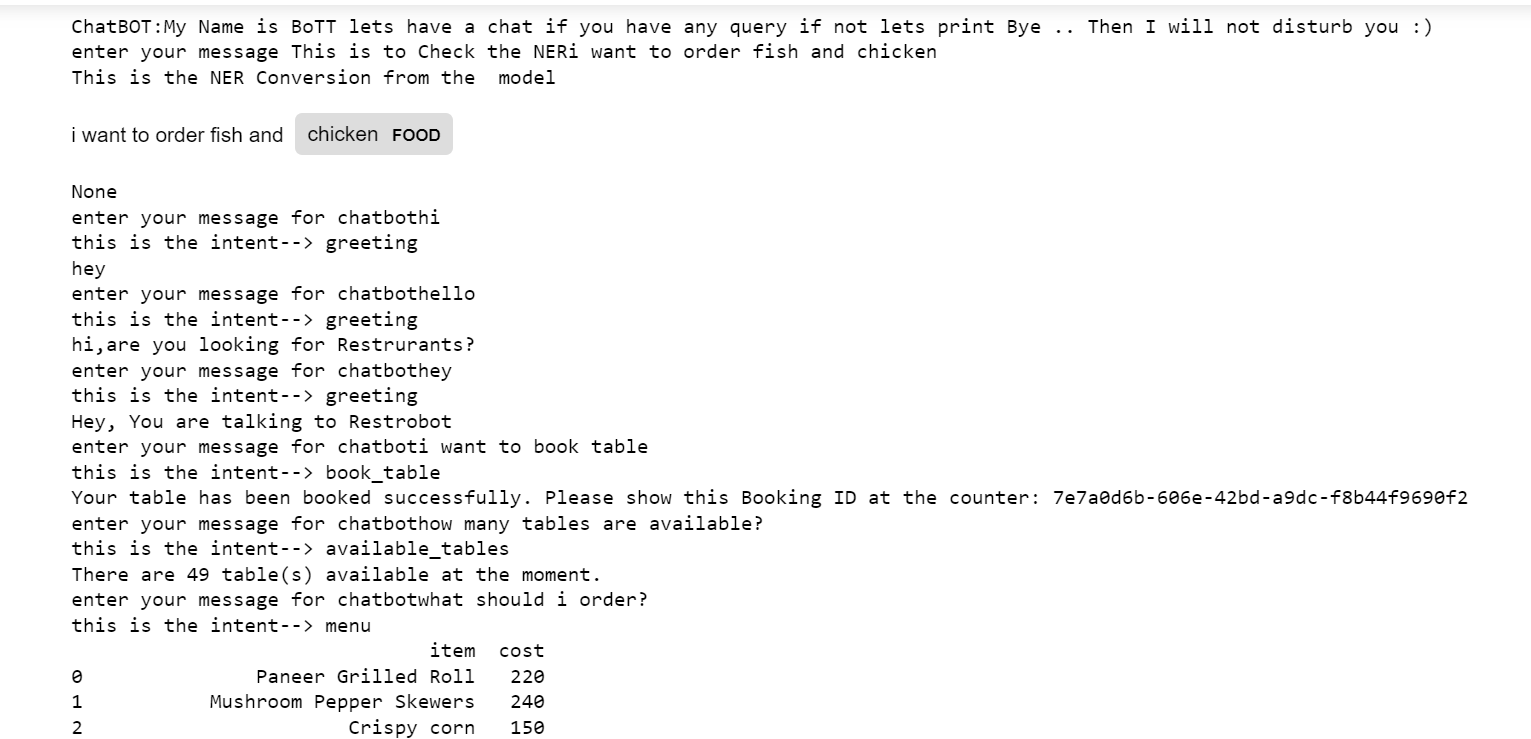

# Performance of Chatbot (TK)

Discuss the performance of the chatbot service you implemented (i.e., perform some stretch testing), and justify the good and bad points